In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


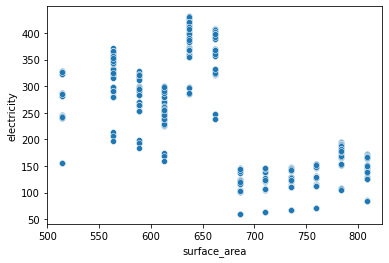

In [6]:
sns.scatterplot(x = Elec['surface_area'], y =Elec['electricity'])
plt.show()

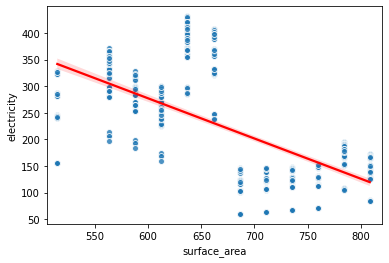

In [8]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
                line_kws = {'color':'red'},
                scatter_kws={'edgecolor':'white'})
plt.xlim(505, 820)
plt.show()

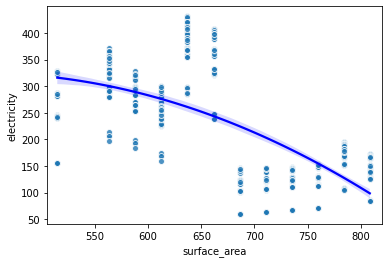

In [12]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws={'color':'blue'},
            order=2,
            scatter_kws={'edgecolor':'white'})
plt.xlim(505, 820)
plt.show()

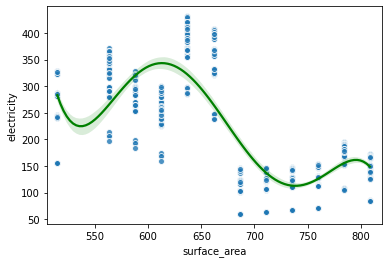

In [13]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws={'color':'green'},
            scatter_kws={'edgecolor':'white'},
            order=5)
plt.xlim(505, 820)
plt.show()

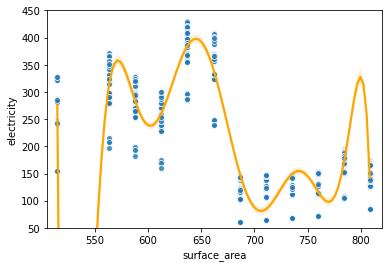

In [16]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws={'color':'orange'},
            scatter_kws={'edgecolor':'white'},
            order=9)
plt.xlim(505, 820)
plt.ylim(50,450)
plt.show()

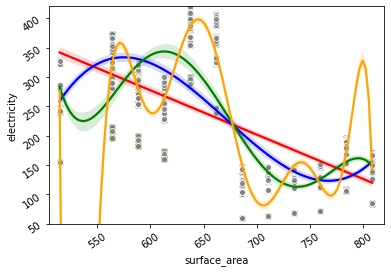

In [19]:
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'red'},  order=1)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'blue'}, order=3)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'green'},  order=5)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'orange'}, scatter_kws={'color':'grey','edgecolor':'white'}, order=9)
plt.xlim(505, 820)
plt.ylim(50, 420)
plt.xticks(rotation = 35)
plt.yticks(rotation = 35)
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
X_train=Elec[['surface_area']]
y_train = Elec[['electricity']]

X_train.shape, y_train.shape

((768, 1), (768, 1))

In [23]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_hat_1 = Model_1.predict(X_train)

TR_Err_1 = np.mean((y_hat_1 - y_train)** 2)
TR_Err_1

electricity    5763.983779
dtype: float64

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5 = poly.fit_transform(X_train)

In [27]:
Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_hat_5 = Model_5.predict(PX_5)

In [32]:
TR_Err_5 = np.mean((y_train - y_hat_5)**2)
TR_Err_5

electricity    4177.726329
dtype: float64

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(X_train, y_train)

In [35]:
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_hat_9 = Model_9.predict(PX_9)

TR_Err_9 = np.mean((y_train - y_hat_9)**2)
TR_Err_9

electricity    4086.719991
dtype: float64

In [38]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  electricity    5763.983779
dtype: float64
5차 모델 :  electricity    4177.726329
dtype: float64
9차 모델 :  electricity    4086.719991
dtype: float64


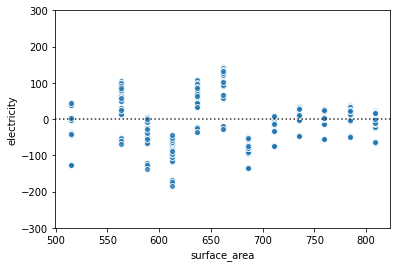

In [39]:
sns.residplot(x='surface_area', y='electricity', data=Elec,
              order = 5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

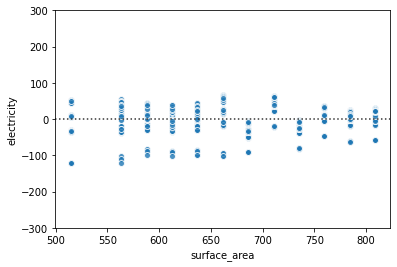

In [40]:
sns.residplot(x='surface_area', y='electricity', data=Elec,
              order = 9,
              scatter_kws = {'edgecolor':'white'})
plt.ylim(-300,300)
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec[['electricity']], test_size=0.3, random_state=2045)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


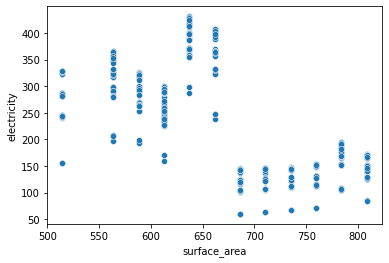

In [44]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


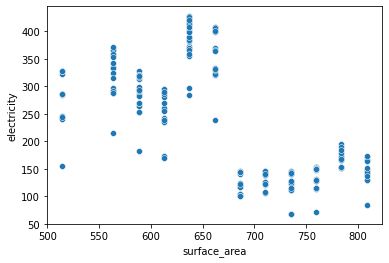

In [45]:
sns.scatterplot(TE_Elec['surface_area'],TE_Elec['electricity'])
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
from sklearn.metrics import mean_squared_error
y_hat_1 = Model_1.predict(X_train)
TR_Err_1 = mean_squared_error(y_train, y_hat_1)
TR_Err_1

5582.381711517925

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
PX_5 = poly.fit_transform(X_train)

In [55]:
Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_hat_5 = Model_5.predict(PX_5)
TR_Err_5 = mean_squared_error(y_train, y_hat_5)
TR_Err_5

5450.88887765815

In [63]:
poly = PolynomialFeatures(degree = 9, include_bias=False)
PX_9 = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_hat_9 = Model_9.predict(PX_9)
TR_Err_9 = mean_squared_error(y_train, y_hat_9)
TR_Err_9

4043.368776410518

In [65]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5582.381711517925
5차 모델 :  5450.88887765815
9차 모델 :  4043.368776410518


In [66]:
from sklearn.model_selection import train_test_split

In [69]:
X_a, X_c, y_a, y_c = train_test_split(Elec[['surface_area']], Elec[['electricity']],
                                      test_size=int(len(Elec)*0.3), random_state=2045) 

In [70]:
X_a, X_b, y_a, y_b = train_test_split(Elec[['surface_area']], Elec[['electricity']],
                                      test_size=int(len(Elec)*0.3), random_state=2045)

In [71]:
print(X_a.shape, y_a.shape)
print(X_b.shape, y_b.shape)
print(X_c.shape, y_c.shape)

(538, 1) (538, 1)
(230, 1) (230, 1)
(230, 1) (230, 1)


In [75]:
# 다항수 변환 -> 모델 만들기 -> y_hat -> MSE
Model_1 = LinearRegression()
Model_1.fit(X_a, y_a)

y_hat_1 = Model_1.predict(X_b)
Err_1 = mean_squared_error(y_b, y_hat_1)
Err_1

6234.241772628158

In [76]:
poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5 = poly.fit_transform(X_a)

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_a)

PX_5_b = poly.fit_transform(X_b)
y_hat_5 = Model_5.predict(PX_5_b)
Err_5 = mean_squared_error(y_b, y_hat_5)
Err_5

4326.229640051277

In [77]:
poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(X_a)

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_a)

PX_9_b = poly.fit_transform(X_b)
y_hat_9 = Model_9.predict(PX_9_b)

Err_9 = mean_squared_error(y_b, y_hat_9)
Err_9

4234.307440300116

In [78]:
print('1차 모델 : ', Err_1)
print('5차 모델 : ', Err_5)
print('9차 모델 : ', Err_9)

1차 모델 :  6234.241772628158
5차 모델 :  4326.229640051277
9차 모델 :  4234.307440300116


In [79]:
PX_9_c = poly.fit_transform(X_c)

mean_squared_error(y_c, Model_9.predict(PX_9_c))

4234.307440300116